## waste Management using CNN model

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')


In [2]:
train_path = "dataset/TRAIN"
test_path = "dataset/TEST"

In [3]:
# importing libraries related to tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob


In [4]:
# visualisation
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
    data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 9999/9999 [00:16<00:00, 621.34it/s]


In [5]:
data.shape

(22564, 2)

<function matplotlib.pyplot.show(close=None, block=None)>

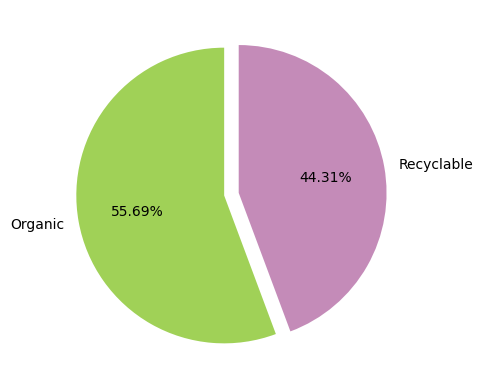

In [6]:
colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%', colors = colors, startangle= 90, explode=[0.05, 0.05])
plt.show

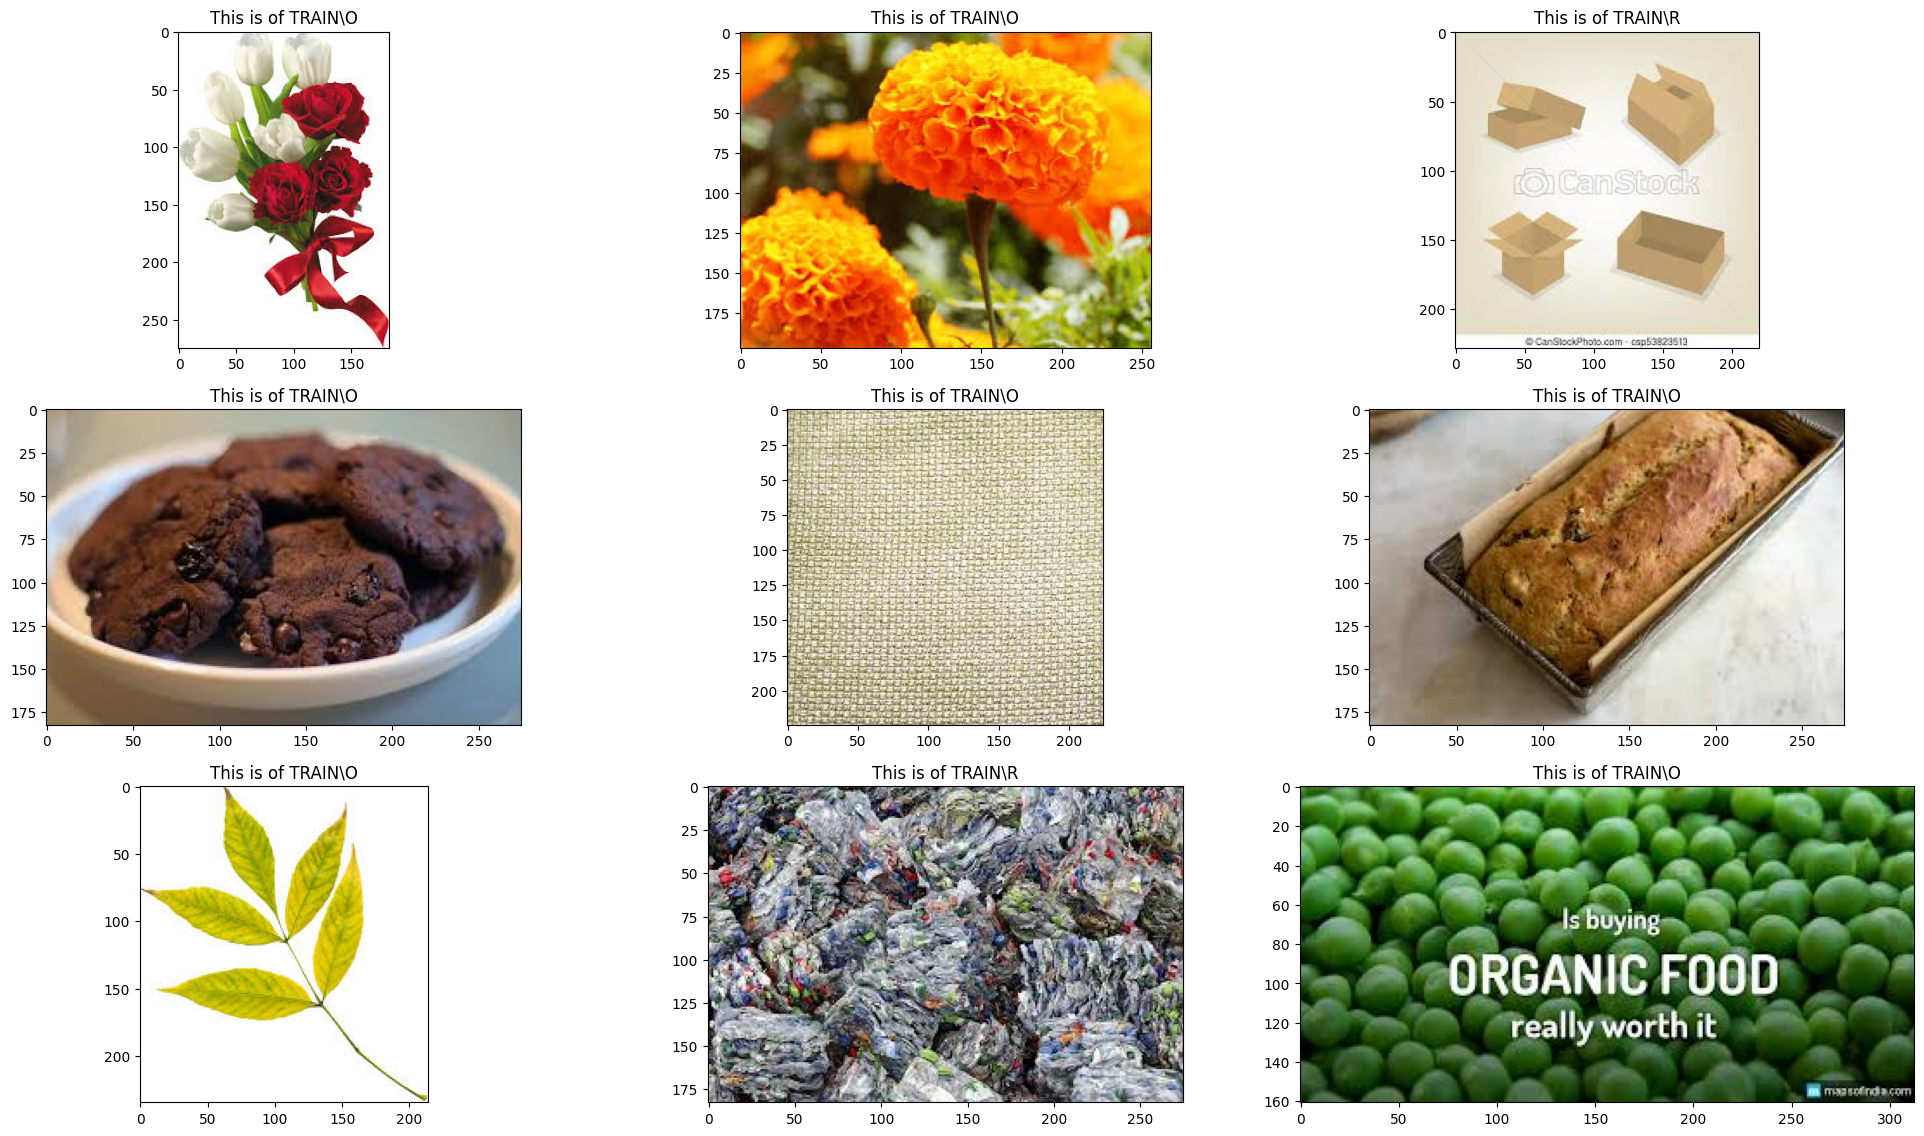

In [8]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3, (i%12)+1)
    index= np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

## CNN- convolution neural network

In [9]:
model = Sequential()
model.add(Conv2D(32,(3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile( loss= "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 256

model.summary()





Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [13]:
hist = model.fit(
    train_generator,
    epochs = 10,
    validation_data = test_generator
)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1252s 14s/step - accuracy: 0.7556 - loss: 0.5583 - val_accuracy: 0.8798 - val_loss: 0.3059
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1135s 13s/step - accuracy: 0.8336 - loss: 0.4008 - val_accuracy: 0.8488 - val_loss: 0.3639
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1172s 13s/step - accuracy: 0.8510 - loss: 0.3647 - val_accuracy: 0.8567 - val_loss: 0.3279
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1123s 13s/step - accuracy: 0.8685 - loss: 0.3351 - val_accuracy: 0.8750 - val_loss: 0.3040
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1182s 13s/step - accuracy: 0.8743 - loss: 0.3164 - val_accuracy: 0.8882 - val_loss: 0.2837
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1119s 13s/step - accuracy: 0.8870 - loss: 0.2828 - val_accuracy: 0.8945 - val_loss: 0.2803
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1112s 12s/step - accuracy: 0.9010 - loss: 0.2568 - val_accuracy: 0.8762 - val_loss: 0.3112
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1177s 13s/step - accuracy: 0.9190 - loss: 0.2115 - val_accu